<a href="https://colab.research.google.com/github/zagajski/ml-heart-failure/blob/main/projekt_prvi_dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uvod u znanost o podacima (UZOP) - Projekt - Prvi dio

Ovaj dio projekta rješavate uz skup podataka kojeg će vam poslati asistent kod kojeg ste se prijavili. Ova vježba nosi ukupno 10 bodova. U slučaju bilo kakvih pitanja ili nejasnoća javite se nadležnom asistentu.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1. Učitajte danu CSV datoteku i prikažite prvih 8 redaka iz skupa podataka. (0,5 boda)

In [ ]:
# KOD OVDJE
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Life_Expectancy_Data_fixed.csv")
data.head()

,Entry number,Source,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Income composition of resources,Schooling,Life expectancy,Measles,BMI,under-five deaths,Diphtheria,HIV/AIDS,thinness 5-9 years,thinness 10-19 years
0,0,WHO,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,...,0.479,10.1,1.0,1154,19.1,83,65.0,0.1,17.3,17.2
1,1,WHO,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,...,0.476,10.0,0.0,492,18.6,86,62.0,0.1,17.5,17.5
2,2,WHO,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,...,0.470,9.9,0.0,430,18.1,89,64.0,0.1,17.7,17.7
3,3,WHO,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,...,0.463,9.8,0.0,2787,17.6,93,67.0,0.1,18.0,17.9
4,4,WHO,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,...,0.454,9.5,0.0,3013,17.2,97,68.0,0.1,18.2,18.2


2. Pronađite monotone i konstantne vrijednosti i uklonite ih. (1 bod)

In [ ]:
# KOD OVDJE
columns_to_drop = []

for col in data.columns:
    if data[col].nunique() == 1:
        columns_to_drop.append(col)
    elif data[col].is_monotonic_increasing or data[col].is_monotonic_decreasing:
        columns_to_drop.append(col)

print("Uklonjeni stupci:")
for col in columns_to_drop:
  print(f"\t{col}")

data_cleaned = data.drop(columns=columns_to_drop)
data_cleaned.head()

Uklonjeni stupci:
	Entry number
	Source


,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,...,Income composition of resources,Schooling,Life expectancy,Measles,BMI,under-five deaths,Diphtheria,HIV/AIDS,thinness 5-9 years,thinness 10-19 years
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,6.0,8.16,...,0.479,10.1,1.0,1154,19.1,83,65.0,0.1,17.3,17.2
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,58.0,8.18,...,0.476,10.0,0.0,492,18.6,86,62.0,0.1,17.5,17.5
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,62.0,8.13,...,0.470,9.9,0.0,430,18.1,89,64.0,0.1,17.7,17.7
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,67.0,8.52,...,0.463,9.8,0.0,2787,17.6,93,67.0,0.1,18.0,17.9
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,68.0,7.87,...,0.454,9.5,0.0,3013,17.2,97,68.0,0.1,18.2,18.2


3. Pronađite nedostajuće vrijednosti. Provedite zamjenu/uklanjanje nedostajućih vrijednosti odgovarajućim postupkom. Objasnite zašto ste primjenili odabrane postupke. (2 boda)

In [ ]:
# KOD OVDJE
missing_values = data_cleaned.isnull().sum()
print("Broj nedostajućih vrijednosti u svakom stupcu:")
print(missing_values)

Broj nedostajućih vrijednosti u svakom stupcu:
Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Polio                                0
Total expenditure                    0
GDP                                  0
Population                           0
Income composition of resources      0
Schooling                            0
Life expectancy                      0
Measles                              0
BMI                                  0
under-five deaths                    0
Diphtheria                           0
HIV/AIDS                             0
thinness 5-9 years                   0
thinness  10-19 years                0
dtype: int64


In [ ]:
data_cleaned['Alcohol'] = data_cleaned['Alcohol'].fillna(data_cleaned['Alcohol'].median())
data_cleaned['Hepatitis B'] = data_cleaned.groupby('Country')['Hepatitis B'].transform(lambda x: x.fillna(x.median()))
data_cleaned['Hepatitis B'] = data_cleaned['Hepatitis B'].fillna(data_cleaned['Hepatitis B'].median())

Udio nedostajućih vrijednosti za značajku Alcohol je 6.6%, što je dovoljno nisko za primijeniti zamjenu.
Udio nedostajućih vrijednosti za značajku Hepatitis B je 18.8%, što je malo viša vrijednost. Zato sam zamjenu primijenila na podatcima grupiranima prema državi jer mislim da o tome donekle ovisi stopa cijepljenja. Preostale nedostajuće vrijednosti za Hepatitis B sam zamijenila isto kao i za Alcohol.

4. Transformirajte kategoričke značajke u numeričke. (1 bod)

In [ ]:
# KOD OVDJE
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Country', 'Status'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

data_transformed = pd.get_dummies(data_cleaned, columns=['Status'], drop_first=True)

label_encoder = LabelEncoder()
data_transformed['Country'] = label_encoder.fit_transform(data_cleaned['Country'])

5. Za numeričke značajke prikažite srednju (mean), centralnu (median), minimalnu i maksimalnu vrijednost. Za kategoričke značajke ispišite učestalost pojavljivanja svake vrijednosti. (1,5 boda)

In [ ]:
# KOD OVDJE
numerical_data = data_transformed.select_dtypes(include=['float64', 'int64'])

numerical_summary = numerical_data.agg(['mean', 'median', 'min', 'max'])
print("Numerical Summary:")
print(numerical_summary)

categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

categorical_summary = {column: data_cleaned[column].value_counts() for column in categorical_columns}

pd.set_option('display.max_rows', None)
print("\nCategorical Summary:")
for column, summary in categorical_summary.items():
    print(f"\n{column}:\n{summary}")
pd.reset_option('display.max_rows')


Numerical Summary:
           Country        Year  Adult Mortality  infant deaths    Alcohol  \
mean     95.096324  2007.51872       164.725664      30.303948   4.546875   
median   93.000000  2008.00000       144.000000       3.000000   3.755000   
min       0.000000  2000.00000         1.000000       0.000000   0.010000   
max     192.000000  2015.00000       723.000000    1800.000000  17.870000   

        percentage expenditure  Hepatitis B      Polio  Total expenditure  \
mean                738.251295    80.099728  82.617767           5.924098   
median               64.912906    91.000000  93.000000           5.755000   
min                   0.000000     1.000000   3.000000           0.370000   
max               19479.911610    99.000000  99.000000          17.600000   

                  GDP  ...  Income composition of resources  Schooling  \
mean      6611.523863  ...                         0.630362  12.009837   
median    1766.947595  ...                         0.677000  

6. Normalizirajte numeričke značajke. (1 bod)

In [ ]:
# KOD OVDJE
from sklearn.preprocessing import MinMaxScaler

numerical_columns = data_transformed.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
data_transformed[numerical_columns] = scaler.fit_transform(data_transformed[numerical_columns])

numerical_data = data_transformed.select_dtypes(include=['float64', 'int64'])

numerical_summary = numerical_data.agg(['mean', 'median', 'min', 'max'])
print("New Numerical Summary:")
print(numerical_summary)

New Numerical Summary:
         Country      Year  Adult Mortality  infant deaths   Alcohol  \
mean    0.495293  0.501248         0.226767       0.016836  0.254024   
median  0.484375  0.533333         0.198061       0.001667  0.209686   
min     0.000000  0.000000         0.000000       0.000000  0.000000   
max     1.000000  1.000000         1.000000       1.000000  1.000000   

        percentage expenditure  Hepatitis B     Polio  Total expenditure  \
mean                  0.037898     0.807140  0.829352           0.322350   
median                0.003332     0.918367  0.937500           0.312536   
min                   0.000000     0.000000  0.000000           0.000000   
max                   1.000000     1.000000  1.000000           1.000000   

             GDP  ...  Income composition of resources  Schooling  \
mean    0.055465  ...                         0.664939   0.580185   
median  0.014813  ...                         0.714135   0.594203   
min     0.000000  ...       

7. Napravite složeni graf s 4 podgrafa (2 retka i 2 stupca). Dodajte nazive podgrafova i označite osi na svakom od njih. Vizualizirajte sljedeće: (3 boda)
  - Histogram proizvoljne kategoričke značajke
  - Pitni graf ciljne varijable
  - Kutijasti graf proizvoljne numeričke varijable
  - Graf raspršenja proizvoljne 2 numeričke varijable. Obojajte uzorke s obzirom na vrijednost ciljne varijable.

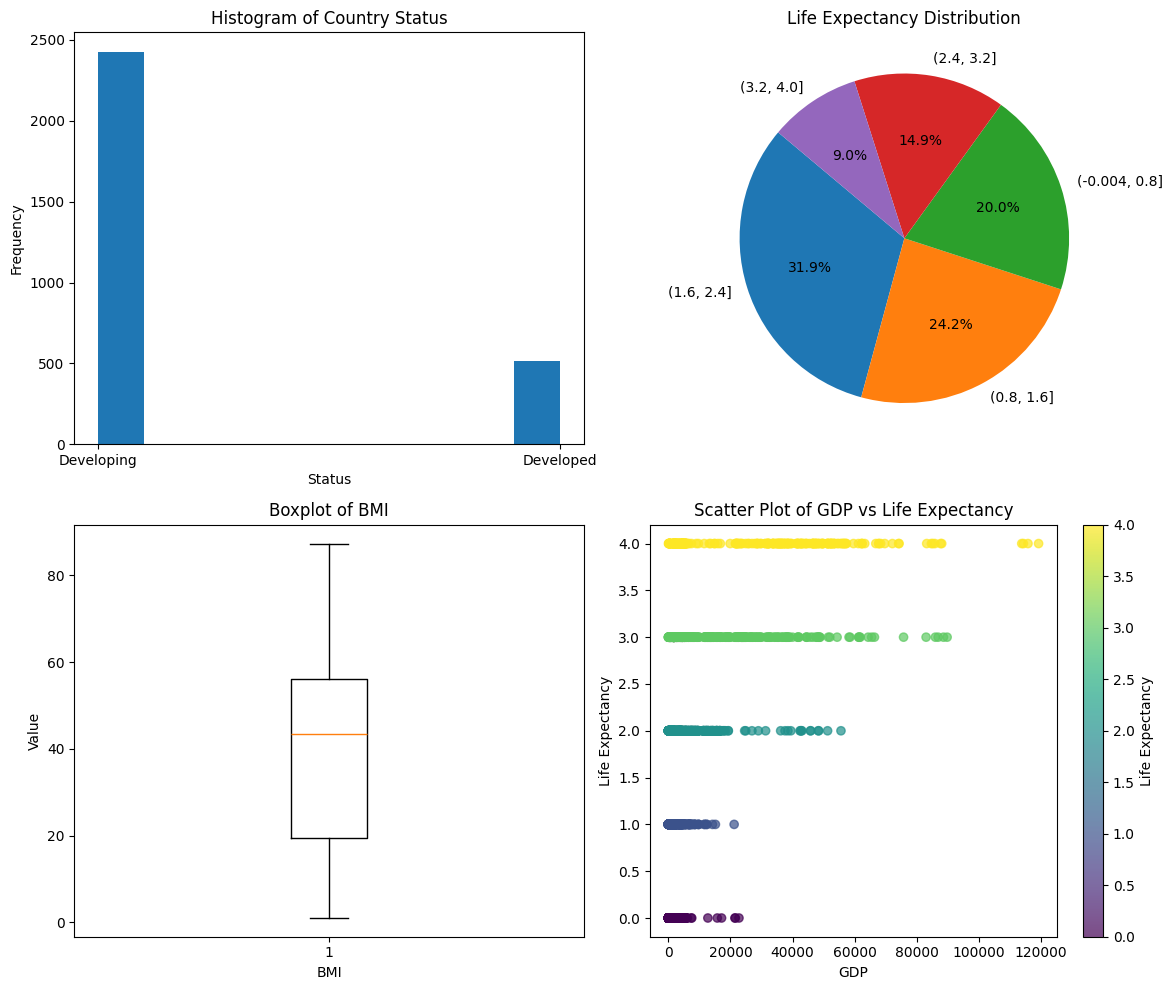

In [ ]:
# KOD OVDJE

# Korišteni su podaci prije normalizacije

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram proizvoljne kategoričke značajke - 'Status' (Developing vs. Developed)
axs[0, 0].hist(data_cleaned['Status'])
axs[0, 0].set_title('Histogram of Country Status')
axs[0, 0].set_xlabel('Status')
axs[0, 0].set_ylabel('Frequency')

# Pitni graf ciljne varijable - 'Life expectancy' (binned for better visualization)
life_expectancy_bins = pd.cut(data_cleaned['Life expectancy'], bins=5)
life_expectancy_counts = life_expectancy_bins.value_counts()
axs[0, 1].pie(life_expectancy_counts, labels=life_expectancy_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Life Expectancy Distribution')

# Kutijasti graf proizvoljne numeričke varijable - 'BMI'
axs[1, 0].boxplot(data_cleaned['BMI'].dropna())
axs[1, 0].set_title('Boxplot of BMI')
axs[1, 0].set_xlabel('BMI')
axs[1, 0].set_ylabel('Value')

# Graf raspršenja proizvoljne 2 numeričke varijable - 'GDP' i 'Life expectancy'
sc = axs[1, 1].scatter(data_cleaned['GDP'], data_cleaned['Life expectancy'],
                       c=data_cleaned['Life expectancy'], cmap='viridis', alpha=0.7)
axs[1, 1].set_title('Scatter Plot of GDP vs Life Expectancy')
axs[1, 1].set_xlabel('GDP')
axs[1, 1].set_ylabel('Life Expectancy')
fig.colorbar(sc, ax=axs[1, 1], label='Life Expectancy')

plt.tight_layout()
plt.show()